# 07. Multi-Brand Dealer Analysis

Dit notebook bereidt dealer data voor om multi-brand informatie goed te kunnen visualiseren in het dashboard.
We maken een locatie-gebaseerde dataset waarbij elke rij één unieke dealer locatie voorstelt met al zijn merken.

In [21]:
import pandas as pd
import numpy as np
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set paths
ROOT = Path('..')
DATA_DIR = ROOT / 'data'
OUTPUT_DIR = ROOT / 'outputs'

print("Loading dealer data...")

Loading dealer data...


In [22]:
# Load the full dealer-brand relationships
dealers_all = pd.read_parquet(DATA_DIR / 'processed' / 'dealers_all_brands.parquet')
print(f"Total brand-dealer relationships: {len(dealers_all):,}")
print(f"Unique locations: {dealers_all['google_place_id'].nunique():,}")
print(f"\nColumns available: {list(dealers_all.columns)}")

# Also load the original dealers data for additional columns
dealers_orig = pd.read_parquet(DATA_DIR / 'processed' / 'dealers.parquet')
print(f"\nOriginal dealers columns: {list(dealers_orig.columns)}")
print(f"Original dealers shape: {dealers_orig.shape}")

Total brand-dealer relationships: 6,748
Unique locations: 2,080

Columns available: ['name', 'brand', 'website', 'google_place_id', 'house_number', 'street', 'country', 'postal_code', 'google_name', 'google_address', 'google_rating', 'google_user_ratings_total', 'google_lat', 'google_lng', 'google_link', 'brand_clean', 'is_pon_dealer']

Original dealers columns: ['google_place_id', 'name', 'google_name', 'brand_clean', 'is_pon_dealer', 'google_rating', 'google_user_ratings_total', 'google_lat', 'google_lng', 'postal_code', 'google_address', 'country', 'google_link', 'website', 'house_number', 'street', 'pon_brand_count', 'total_brand_count', 'brands_sold', 'brand', 'pc4']
Original dealers shape: (2080, 21)


## 1. Create Location-Based Dataset

In [23]:
# First, let's see what columns we actually have
print("Columns in dealers_all:", dealers_all.columns.tolist())
print("\nColumns in dealers_orig:", dealers_orig.columns.tolist())

# The columns have different names - use the correct ones
# dealers_all already has most of what we need, just rename for consistency
dealers_full = dealers_all.copy()

# Get pc4 from dealers_orig if available
if 'pc4' in dealers_orig.columns:
    pc4_mapping = dealers_orig[['google_place_id', 'pc4']].drop_duplicates('google_place_id')
    dealers_full = dealers_full.merge(pc4_mapping, on='google_place_id', how='left')

# Rename columns for consistency
dealers_full = dealers_full.rename(columns={
    'google_rating': 'rating',
    'google_user_ratings_total': 'n_reviews',
    'google_address': 'address'
})

print(f"\nFull dataset shape: {dealers_full.shape}")
print(f"Columns available: {dealers_full.columns.tolist()}")

Columns in dealers_all: ['name', 'brand', 'website', 'google_place_id', 'house_number', 'street', 'country', 'postal_code', 'google_name', 'google_address', 'google_rating', 'google_user_ratings_total', 'google_lat', 'google_lng', 'google_link', 'brand_clean', 'is_pon_dealer']

Columns in dealers_orig: ['google_place_id', 'name', 'google_name', 'brand_clean', 'is_pon_dealer', 'google_rating', 'google_user_ratings_total', 'google_lat', 'google_lng', 'postal_code', 'google_address', 'country', 'google_link', 'website', 'house_number', 'street', 'pon_brand_count', 'total_brand_count', 'brands_sold', 'brand', 'pc4']

Full dataset shape: (6748, 18)
Columns available: ['name', 'brand', 'website', 'google_place_id', 'house_number', 'street', 'country', 'postal_code', 'google_name', 'address', 'rating', 'n_reviews', 'google_lat', 'google_lng', 'google_link', 'brand_clean', 'is_pon_dealer', 'pc4']


In [24]:
  # First, let's see what columns we actually have
  print("Columns in dealers_all:", dealers_all.columns.tolist())
  print("\nColumns in dealers_orig:", dealers_orig.columns.tolist())

  # The columns have different names - use the correct ones
  # dealers_all already has most of what we need, just rename for consistency
  dealers_full = dealers_all.copy()

  # Get pc4 from dealers_orig if available
  if 'pc4' in dealers_orig.columns:
      pc4_mapping = dealers_orig[['google_place_id', 'pc4']].drop_duplicates('google_place_id')
      dealers_full = dealers_full.merge(pc4_mapping, on='google_place_id', how='left')

  # Rename columns for consistency
  dealers_full = dealers_full.rename(columns={
      'google_rating': 'rating',
      'google_user_ratings_total': 'n_reviews',
      'google_address': 'address'
  })

  print(f"\nFull dataset shape: {dealers_full.shape}")
  print(f"Columns available: {dealers_full.columns.tolist()}")

Columns in dealers_all: ['name', 'brand', 'website', 'google_place_id', 'house_number', 'street', 'country', 'postal_code', 'google_name', 'google_address', 'google_rating', 'google_user_ratings_total', 'google_lat', 'google_lng', 'google_link', 'brand_clean', 'is_pon_dealer']

Columns in dealers_orig: ['google_place_id', 'name', 'google_name', 'brand_clean', 'is_pon_dealer', 'google_rating', 'google_user_ratings_total', 'google_lat', 'google_lng', 'postal_code', 'google_address', 'country', 'google_link', 'website', 'house_number', 'street', 'pon_brand_count', 'total_brand_count', 'brands_sold', 'brand', 'pc4']

Full dataset shape: (6748, 18)
Columns available: ['name', 'brand', 'website', 'google_place_id', 'house_number', 'street', 'country', 'postal_code', 'google_name', 'address', 'rating', 'n_reviews', 'google_lat', 'google_lng', 'google_link', 'brand_clean', 'is_pon_dealer', 'pc4']


In [31]:
  # Extract PC4 from postal codes (zoals in notebook 01)
  dealers_full["postal_code"] = dealers_full["postal_code"].astype(str).str.replace(" ", "", regex=False)
  dealers_full["pc4"] = dealers_full["postal_code"].str[:4].str.extract(r"(\d{4})")[0]

  print(f"PC4 extracted for {dealers_full['pc4'].notna().sum()} out of {len(dealers_full)} records")

PC4 extracted for 6746 out of 6748 records


In [32]:
  # Now group by location to get all brands per dealer
  # Build aggregation dict based on available columns
  agg_dict = {
      'name': 'first',
      'google_lat': 'first',
      'google_lng': 'first',
      'brand': lambda x: list(x),  # All original brand names
      'brand_clean': lambda x: list(x),  # All cleaned brand names
      'is_pon_dealer': 'any'  # True if ANY brand is Pon
  }

  # Add optional columns if they exist
  optional_cols = {
      'rating': 'first',
      'n_reviews': 'first',
      'address': 'first',
      'city': 'first'
  }

  for col, agg_func in optional_cols.items():
      if col in dealers_full.columns:
          agg_dict[col] = agg_func

  location_data = dealers_full.groupby('google_place_id').agg(agg_dict).reset_index()

  # Add brand counts
  location_data['n_brands'] = location_data['brand'].apply(len)
  location_data['n_brands_clean'] = location_data['brand_clean'].apply(lambda x: len(set(x)))

  print(f"Unique dealer locations: {len(location_data):,}")
  print(f"\nBrand distribution:")
  print(location_data['n_brands'].value_counts().head(10))
  print(f"\nSample data:")
  location_data.head(3)

Unique dealer locations: 2,080

Brand distribution:
n_brands
1     676
2     359
3     301
4     212
5     162
6     127
7     103
8      66
9      47
10     15
Name: count, dtype: int64

Sample data:


,google_place_id,name,google_lat,google_lng,brand,brand_clean,is_pon_dealer,rating,n_reviews,address,n_brands,n_brands_clean
0,ChIJ-2kPgMCiwEcRJrp-4RDRnLI,Cube Store Limburg,50.899706,5.822660,[cube],[cube],False,4.3,83.0,"Torenstraat 1A, 6333 BC Schimmert, Netherlands",1,1
1,ChIJ-3E2HUWpx0cRUOfhdcZcZLs,Fietswinkel Gelderland,51.952665,5.761676,"[cannondale, cube, gazelle, qwic, trek]","[cannondale, cube, gazelle, qwic, trek]",True,4.8,130.0,"Poort van Midden Gelderland Blauw 14, 6666 LR ...",5,5
2,ChIJ-5855EG-xkcRsFtftq4-Wig,Ventoux V.O.F.,51.548954,5.063282,[scott],[scott],False,4.6,40.0,"Berkdijksestraat 81, 5025 VD Tilburg, Netherlands",1,1


## 2. Analyze Multi-Brand Patterns

In [33]:
# Identify Pon brands
PON_BRANDS = ['gazelle', 'cannondale', 'union', 'kalkhoff', 'urban_arrow', 
              'cervélo', 'cervelo', 'focus', 'santa_cruz']

# Count Pon brands per location
location_data['pon_brands'] = location_data['brand_clean'].apply(
    lambda brands: [b for b in brands if b in PON_BRANDS]
)
location_data['n_pon_brands'] = location_data['pon_brands'].apply(len)

# Categorize dealers
location_data['dealer_type'] = 'Non-Pon'
location_data.loc[location_data['n_pon_brands'] == 1, 'dealer_type'] = 'Single Pon'
location_data.loc[location_data['n_pon_brands'] > 1, 'dealer_type'] = 'Multi Pon'

print("Dealer Type Distribution:")
print(location_data['dealer_type'].value_counts())
print(f"\nPercentage with multiple Pon brands: {(location_data['n_pon_brands'] > 1).mean():.1%}")

Dealer Type Distribution:
dealer_type
Non-Pon       1102
Single Pon     585
Multi Pon      393
Name: count, dtype: int64

Percentage with multiple Pon brands: 18.9%


# Create comma-separated brand lists for display
location_data['brands_display'] = location_data['brand'].apply(
    lambda x: ', '.join(sorted(set(x))) if x else 'Unknown'
)

location_data['pon_brands_display'] = location_data['pon_brands'].apply(
    lambda x: ', '.join([b.title() for b in sorted(set(x))]) if x else ''
)

# Format rating for display - handle missing values
if 'rating' in location_data.columns:
    location_data['rating_display'] = location_data.apply(
        lambda row: f"{row['rating']:.1f} ({int(row.get('n_reviews', 0))} reviews)" 
        if pd.notna(row.get('rating')) and row.get('rating', 0) > 0 
        else "No rating", axis=1
    )
else:
    location_data['rating_display'] = "No rating"

# Preview
print("Sample dealer displays:")
sample = location_data[location_data['n_pon_brands'] > 1].head(3)
for _, dealer in sample.iterrows():
    print(f"\n{dealer['name']}:")
    print(f"  Brands: {dealer['brands_display'][:100]}...")
    print(f"  Pon brands: {dealer['pon_brands_display']}")
    if 'rating_display' in dealer:
        print(f"  Rating: {dealer['rating_display']}")

In [34]:
# Create comma-separated brand lists for display
location_data['brands_display'] = location_data['brand'].apply(
    lambda x: ', '.join(sorted(set(x))) if x else 'Unknown'
)

location_data['pon_brands_display'] = location_data['pon_brands'].apply(
    lambda x: ', '.join([b.title() for b in sorted(set(x))]) if x else ''
)

# Format rating for display
location_data['rating_display'] = location_data.apply(
    lambda row: f"{row['rating']:.1f} ({int(row['n_reviews'])} reviews)" 
    if pd.notna(row['rating']) and row['rating'] > 0 
    else "No rating", axis=1
)

# Preview
print("Sample dealer displays:")
sample = location_data[location_data['n_pon_brands'] > 1].head(3)
for _, dealer in sample.iterrows():
    print(f"\n{dealer['name']}:")
    print(f"  Brands: {dealer['brands_display'][:100]}...")
    print(f"  Pon brands: {dealer['pon_brands_display']}")
    print(f"  Rating: {dealer['rating_display']}")

Sample dealer displays:

Fietswinkel Gelderland:
  Brands: cannondale, cube, gazelle, qwic, trek...
  Pon brands: Cannondale, Gazelle
  Rating: 4.8 (130 reviews)

Van Der Veeken Tweewielers Etten-Leur B.V.:
  Brands: batavus, cortina, gazelle, giant, merida, urban_arrow...
  Pon brands: Gazelle, Urban_Arrow
  Rating: 4.1 (30 reviews)

Banierhuis B.V. -Vleuten:
  Brands: batavus, cannondale, cortina, cube, gazelle, koga, merida, sparta, urban_arrow...
  Pon brands: Cannondale, Gazelle, Urban_Arrow
  Rating: 3.8 (68 reviews)


## 4. Calculate Multi-Brand Statistics

In [36]:
  # Extract PC4 from postal codes (zoals in notebook 01)
  print("Extracting PC4 from postal codes...")
  dealers_full["postal_code"] = dealers_full["postal_code"].astype(str).str.replace(" ", "", regex=False)
  dealers_full["pc4"] = dealers_full["postal_code"].str[:4].str.extract(r"(\d{4})")[0]

  print(f"PC4 extracted for {dealers_full['pc4'].notna().sum()} out of {len(dealers_full)} records")

  # Now group by location to get all brands per dealer
  # Build aggregation dict based on available columns
  agg_dict = {
      'name': 'first',
      'google_lat': 'first',
      'google_lng': 'first',
      'brand': lambda x: list(x),  # All original brand names
      'brand_clean': lambda x: list(x),  # All cleaned brand names
      'is_pon_dealer': 'any',  # True if ANY brand is Pon
      'pc4': 'first'  # Include PC4 in aggregation
  }

  # Add optional columns if they exist
  optional_cols = {
      'rating': 'first',
      'n_reviews': 'first',
      'address': 'first',
      'postal_code': 'first'
  }

  for col, agg_func in optional_cols.items():
      if col in dealers_full.columns:
          agg_dict[col] = agg_func

  location_data = dealers_full.groupby('google_place_id').agg(agg_dict).reset_index()

  # Add brand counts
  location_data['n_brands'] = location_data['brand'].apply(len)
  location_data['n_brands_clean'] = location_data['brand_clean'].apply(lambda x: len(set(x)))

  print(f"\nUnique dealer locations: {len(location_data):,}")
  print(f"PC4 data available for: {location_data['pc4'].notna().sum()} locations")
  print(f"\nBrand distribution:")
  print(location_data['n_brands'].value_counts().head(10))

Extracting PC4 from postal codes...
PC4 extracted for 6746 out of 6748 records

Unique dealer locations: 2,080
PC4 data available for: 2078 locations

Brand distribution:
n_brands
1     676
2     359
3     301
4     212
5     162
6     127
7     103
8      66
9      47
10     15
Name: count, dtype: int64


In [45]:
  # Identify Pon brands
  PON_BRANDS = ['gazelle', 'cannondale', 'union', 'kalkhoff', 'urban_arrow',
                'cervélo', 'cervelo', 'focus', 'santa_cruz']

  # Count Pon brands per location
  location_data['pon_brands'] = location_data['brand_clean'].apply(
      lambda brands: [b for b in brands if b in PON_BRANDS]
  )
  location_data['n_pon_brands'] = location_data['pon_brands'].apply(len)

  # Categorize dealers
  location_data['dealer_type'] = 'Non-Pon'
  location_data.loc[location_data['n_pon_brands'] == 1, 'dealer_type'] = 'Single Pon'
  location_data.loc[location_data['n_pon_brands'] > 1, 'dealer_type'] = 'Multi Pon'

  print("Dealer Type Distribution:")
  print(location_data['dealer_type'].value_counts())
  print(f"\nPercentage with multiple Pon brands: {(location_data['n_pon_brands'] > 1).mean():.1%}")

Dealer Type Distribution:
dealer_type
Non-Pon       1102
Single Pon     585
Multi Pon      393
Name: count, dtype: int64

Percentage with multiple Pon brands: 18.9%


In [47]:
  # Statistics by region - if we have geographic data  
  if 'pc4' in location_data.columns:
      # Load gemeente mapping
      demo = pd.read_parquet(DATA_DIR / 'processed' / 'demografie.parquet')

      # Get PC4 to provincie mapping
      if 'gemeente' in demo.columns and 'provincie' in demo.columns:
          pc4_geo = demo[['pc4', 'gemeente', 'provincie']].drop_duplicates('pc4')
          location_data = location_data.merge(pc4_geo, on='pc4', how='left')

          print(f"Added geographic data for {location_data['provincie'].notna().sum()} locations")

          # Now calculate regional stats
          regional_stats = location_data.groupby('provincie').agg({
              'google_place_id': 'count',
              'n_brands': 'mean',
              'n_pon_brands': 'mean',
              'is_pon_dealer': 'mean'
          }).round(2)

          regional_stats.columns = ['n_dealers', 'avg_brands', 'avg_pon_brands', 'pon_share']
          regional_stats = regional_stats.sort_values('n_dealers', ascending=False)

          print("\nRegional Multi-Brand Statistics:")
          print(regional_stats)
      else:
          # Als demografie geen provincie heeft, gebruik de woonplaatsen file
          from glob import glob
          woonplaatsen_files = glob('../data/external/Woonplaatsen_in_Nederland_2024*.csv')

          if woonplaatsen_files:
              woonplaatsen_path = woonplaatsen_files[0]
              print(f"Using woonplaatsen file: {woonplaatsen_path}")

              # Read CSV with correct parameters
              woonplaatsen = pd.read_csv(
                  woonplaatsen_path,
                  sep=';',
                  skiprows=5,
                  encoding='utf-8-sig'
              )

              # Fix column names
              woonplaatsen.columns = ['Woonplaats', 'WoonplaatsCode', 'Gemeente', 'GemeenteCode',
                                    'Provincie', 'ProvincieCode', 'Landsdeel', 'LandsdeelCode']

              print(f"Loaded {len(woonplaatsen)} woonplaatsen")

              # Extract gemeente from address 
              if 'address' in location_data.columns:
                  location_data['gemeente_raw'] = location_data['address'].str.split(',').str[-2].str.strip()
                  location_data['gemeente'] = location_data['gemeente_raw'].str.replace(r'^\d{4}\s*[A-Z]{2}\s*', '', regex=True)
                  location_data['gemeente'] = location_data['gemeente'].str.replace(' Nederland', '').str.strip()

                  # Map gemeente to provincie using woonplaatsen
                  gemeente_provincie = woonplaatsen[['Gemeente', 'Provincie']].drop_duplicates('Gemeente')

                  # BEFORE MERGE: Remove duplicate columns to avoid conflicts
                  if 'Gemeente' in location_data.columns:
                      location_data = location_data.drop('Gemeente', axis=1)
                  if 'provincie' in location_data.columns:
                      location_data = location_data.drop('provincie', axis=1)

                  location_data = location_data.merge(gemeente_provincie, left_on='gemeente', right_on='Gemeente', how='left')
                  location_data = location_data.rename(columns={'Provincie': 'provincie'})

                  # Remove duplicate Gemeente column after merge
                  if 'Gemeente' in location_data.columns:
                      location_data = location_data.drop('Gemeente', axis=1)

                  print(f"Added provincie via woonplaatsen for {location_data['provincie'].notna().sum()} locations")

                  # Check for duplicate columns
                  duplicate_cols = location_data.columns[location_data.columns.duplicated()]
                  if len(duplicate_cols) > 0:
                      print(f"WARNING: Found duplicate columns: {list(duplicate_cols)}")
                      # Remove duplicate columns
                      location_data = location_data.loc[:, ~location_data.columns.duplicated()]
                      print("Removed duplicate columns")

                  # Show sample mapping safely
                  if location_data['provincie'].notna().sum() > 0:
                      sample_data = location_data[location_data['provincie'].notna()].head(5)
                      if 'gemeente' in sample_data.columns and 'provincie' in sample_data.columns:
                          print(f"Sample mapping:")
                          for _, row in sample_data.iterrows():
                              print(f"  {row['gemeente']} -> {row['provincie']}")
          else:
              print("No Woonplaatsen file found")

          # Calculate regional stats if we have provincie data
          if 'provincie' in location_data.columns and location_data['provincie'].notna().sum() > 0:
              # Filter data with provincie info
              data_with_provincie = location_data[location_data['provincie'].notna()].copy()

              regional_stats = data_with_provincie.groupby('provincie').agg({
                  'google_place_id': 'count',
                  'n_brands': 'mean',
                  'n_pon_brands': 'mean',
                  'is_pon_dealer': 'mean'
              }).round(2)

              regional_stats.columns = ['n_dealers', 'avg_brands', 'avg_pon_brands', 'pon_share']
              regional_stats = regional_stats.sort_values('n_dealers', ascending=False)

              print("\nRegional Multi-Brand Statistics:")
              print(regional_stats)
          else:
              print("Could not calculate regional statistics - no provincie data available")
  else:
      print("No PC4 data available for regional analysis")

Using woonplaatsen file: ../data/external/Woonplaatsen_in_Nederland_2024_06092025_004413.csv
Loaded 2501 woonplaatsen
Added provincie via woonplaatsen for 1059 locations
Sample mapping:
  Tilburg -> Noord-Brabant
  Etten-Leur -> Noord-Brabant
  Utrecht -> Utrecht
  Harderwijk -> Gelderland
  Eindhoven -> Noord-Brabant

Regional Multi-Brand Statistics:
               n_dealers  avg_brands  avg_pon_brands  pon_share
provincie                                                      
Noord-Holland        234        2.85            0.68       0.41
Gelderland           157        3.25            0.78       0.51
Zuid-Holland         148        3.22            0.76       0.46
Noord-Brabant        146        3.13            0.78       0.48
Utrecht              114        3.28            0.75       0.46
Overijssel            86        3.56            0.79       0.56
Limburg               48        2.73            0.60       0.33
Groningen             34        2.82            0.79       0.47
Drenth

In [48]:
# Statistics by region
regional_stats = location_data.groupby('provincie').agg({
    'google_place_id': 'count',
    'n_brands': 'mean',
    'n_pon_brands': 'mean',
    'is_pon_dealer': 'mean'
}).round(2)

regional_stats.columns = ['n_dealers', 'avg_brands', 'avg_pon_brands', 'pon_share']
regional_stats = regional_stats.sort_values('n_dealers', ascending=False)

print("\nRegional Multi-Brand Statistics:")
print(regional_stats)


Regional Multi-Brand Statistics:
               n_dealers  avg_brands  avg_pon_brands  pon_share
provincie                                                      
Noord-Holland        234        2.85            0.68       0.41
Gelderland           157        3.25            0.78       0.51
Zuid-Holland         148        3.22            0.76       0.46
Noord-Brabant        146        3.13            0.78       0.48
Utrecht              114        3.28            0.75       0.46
Overijssel            86        3.56            0.79       0.56
Limburg               48        2.73            0.60       0.33
Groningen             34        2.82            0.79       0.47
Drenthe               31        2.87            0.48       0.29
Flevoland             23        3.17            0.87       0.52
Fryslân               20        3.30            0.80       0.70
Zeeland               18        3.78            0.83       0.50


# Select columns for dashboard - only include columns that exist
base_cols = ['google_place_id', 'name', 'google_lat', 'google_lng',
             'brands_display', 'pon_brands_display', 
             'n_brands', 'n_pon_brands', 'is_pon_dealer', 'dealer_type']

optional_cols = ['rating', 'n_reviews', 'rating_display', 'address', 'pc4', 'gemeente', 'provincie']

dashboard_cols = base_cols + [col for col in optional_cols if col in location_data.columns]

dealers_dashboard = location_data[dashboard_cols].copy()

# Save to processed data
output_path = DATA_DIR / 'processed' / 'dealers_dashboard.parquet'
dealers_dashboard.to_parquet(output_path, index=False)
print(f"\nSaved dashboard data to: {output_path}")
print(f"Shape: {dealers_dashboard.shape}")
print(f"Columns: {list(dealers_dashboard.columns)}")

In [53]:
# Select columns for dashboard - only include columns that exist
base_cols = ['google_place_id', 'name', 'google_lat', 'google_lng',
               'n_brands', 'n_pon_brands', 'is_pon_dealer', 'dealer_type']

optional_cols = ['rating', 'n_reviews', 'rating_display', 'address', 'pc4',
                  'gemeente', 'provincie', 'brands_display', 'pon_brands_display']

# Check what columns actually exist
print("Available columns in location_data:")
print(list(location_data.columns))

  # Only include columns that exist
dashboard_cols = base_cols + [col for col in optional_cols if col in location_data.columns]

print(f"\nColumns selected for dashboard: {dashboard_cols}")

  # Check if we're missing critical display columns
missing_display_cols = [col for col in ['brands_display', 'pon_brands_display', 'rating_display']
                         if col not in location_data.columns]

if missing_display_cols:
      print(f"\nCreating missing display columns: {missing_display_cols}")

      # Create brands_display if missing
      if 'brands_display' not in location_data.columns and 'brand' in location_data.columns:
          location_data['brands_display'] = location_data['brand'].apply(
              lambda x: ', '.join(sorted(set(x))) if isinstance(x, list) else str(x)
          )
          dashboard_cols.append('brands_display')

      # Create pon_brands_display if missing  
      if 'pon_brands_display' not in location_data.columns and 'pon_brands' in location_data.columns:
          location_data['pon_brands_display'] = location_data['pon_brands'].apply(
              lambda x: ', '.join([b.title() for b in sorted(set(x))]) if x else ''
          )
          dashboard_cols.append('pon_brands_display')

      # Create rating_display if missing
      if 'rating_display' not in location_data.columns:
          if 'rating' in location_data.columns and 'n_reviews' in location_data.columns:
              location_data['rating_display'] = location_data.apply(
                  lambda row: f"{row['rating']:.1f} ({int(row['n_reviews'])} reviews)"
                  if pd.notna(row.get('rating')) and row.get('rating', 0) > 0
                  else "No rating", axis=1
              )
          elif 'rating' in location_data.columns:
              location_data['rating_display'] = location_data.apply(
                  lambda row: f"{row['rating']:.1f}"
                  if pd.notna(row.get('rating')) and row.get('rating', 0) > 0
                  else "No rating", axis=1
              )
          else:
              location_data['rating_display'] = "No rating"
          dashboard_cols.append('rating_display')

print(f"\nFinal dashboard columns: {dashboard_cols}")

  # Now create the dashboard dataframe
dealers_dashboard = location_data[dashboard_cols].copy()

  # Save to processed data
output_path = DATA_DIR / 'processed' / 'dealers_dashboard.parquet'
dealers_dashboard.to_parquet(output_path, index=False)
print(f"\nSaved dashboard data to: {output_path}")
print(f"Shape: {dealers_dashboard.shape}")
print(f"Columns: {list(dealers_dashboard.columns)}")

  # Show a sample
print(f"\nSample data:")
print(dealers_dashboard.head(2))

Available columns in location_data:
['google_place_id', 'name', 'google_lat', 'google_lng', 'brand', 'brand_clean', 'is_pon_dealer', 'pc4', 'rating', 'n_reviews', 'address', 'postal_code', 'n_brands', 'n_brands_clean', 'gemeente_raw', 'gemeente', 'Gemeente_x', 'pon_brands', 'n_pon_brands', 'dealer_type', 'Gemeente_y', 'provincie']

Columns selected for dashboard: ['google_place_id', 'name', 'google_lat', 'google_lng', 'n_brands', 'n_pon_brands', 'is_pon_dealer', 'dealer_type', 'rating', 'n_reviews', 'address', 'pc4', 'gemeente', 'provincie']

Creating missing display columns: ['brands_display', 'pon_brands_display', 'rating_display']

Final dashboard columns: ['google_place_id', 'name', 'google_lat', 'google_lng', 'n_brands', 'n_pon_brands', 'is_pon_dealer', 'dealer_type', 'rating', 'n_reviews', 'address', 'pc4', 'gemeente', 'provincie', 'brands_display', 'pon_brands_display', 'rating_display']

Saved dashboard data to: ../data/processed/dealers_dashboard.parquet
Shape: (2080, 17)
Colu

## 6. Create Multi-Brand Insights

In [50]:
# Key insights for board presentation
insights = {
    'total_locations': len(location_data),
    'multi_brand_locations': (location_data['n_brands'] > 1).sum(),
    'multi_brand_pct': (location_data['n_brands'] > 1).mean() * 100,
    'avg_brands_per_location': location_data['n_brands'].mean(),
    'max_brands_single_location': location_data['n_brands'].max(),
    'pon_exclusive_dealers': (location_data['dealer_type'] == 'Single Pon').sum(),
    'multi_pon_dealers': (location_data['dealer_type'] == 'Multi Pon').sum(),
    'cannibalization_risk': (location_data['n_pon_brands'] > 1).mean() * 100
}

print("\n=== MULTI-BRAND INSIGHTS ===")
print(f"Total unique locations: {insights['total_locations']:,}")
print(f"Multi-brand locations: {insights['multi_brand_locations']:,} ({insights['multi_brand_pct']:.1f}%)")
print(f"Average brands per location: {insights['avg_brands_per_location']:.1f}")
print(f"Maximum brands at one location: {insights['max_brands_single_location']}")
print(f"\nPon Network:")
print(f"  Pon-exclusive dealers: {insights['pon_exclusive_dealers']:,}")
print(f"  Multi-Pon dealers: {insights['multi_pon_dealers']:,}")
print(f"  Internal cannibalization risk: {insights['cannibalization_risk']:.1f}%")

# Save insights
pd.DataFrame([insights]).to_csv(OUTPUT_DIR / 'tables' / 'multi_brand_insights.csv', index=False)


=== MULTI-BRAND INSIGHTS ===
Total unique locations: 2,080
Multi-brand locations: 1,404 (67.5%)
Average brands per location: 3.2
Maximum brands at one location: 70

Pon Network:
  Pon-exclusive dealers: 585
  Multi-Pon dealers: 393
  Internal cannibalization risk: 18.9%


## 7. Visualizations for Dashboard

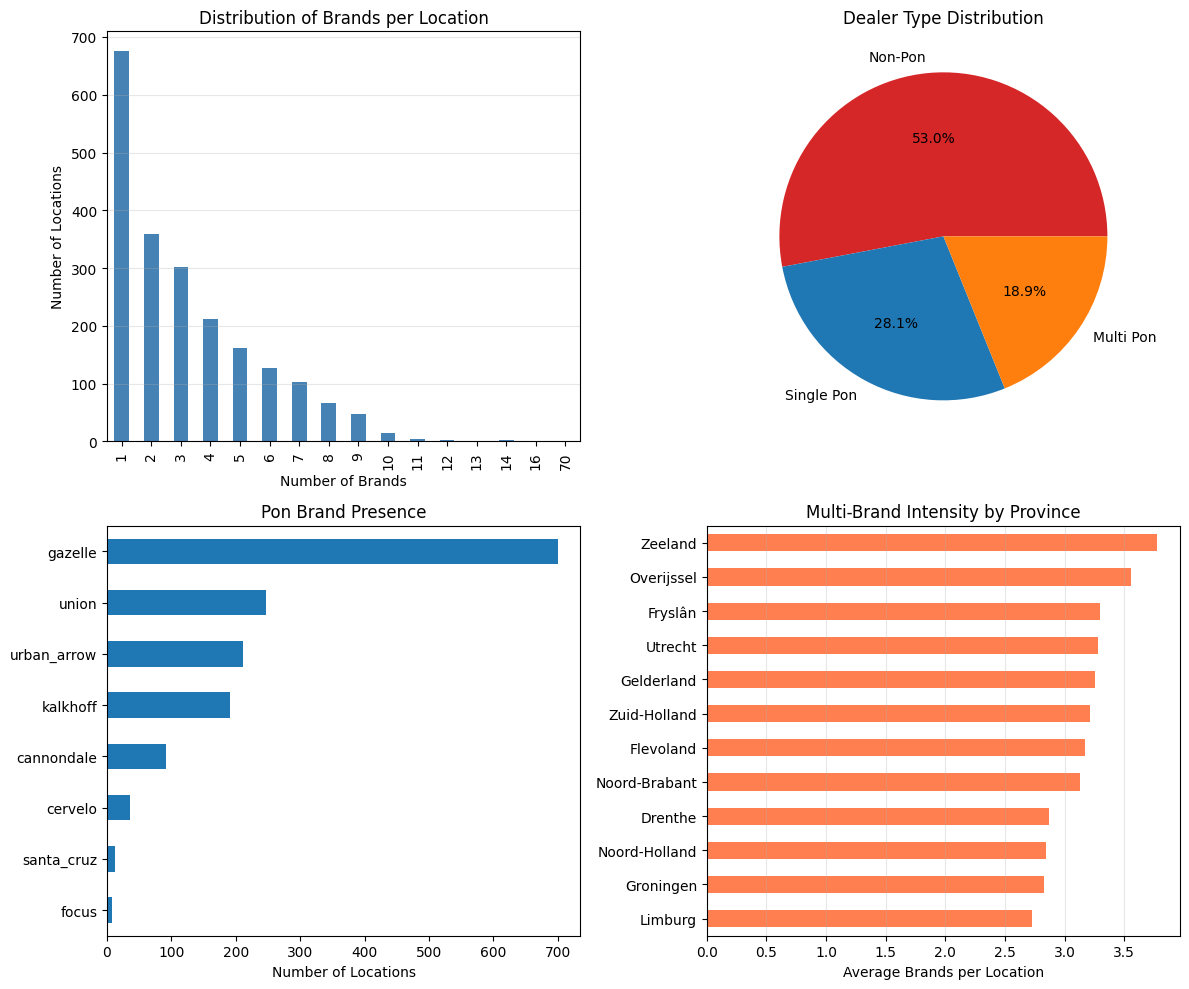


Visualization saved to outputs/figures/multi_brand_analysis.png


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Brand count distribution
ax = axes[0, 0]
location_data['n_brands'].value_counts().sort_index().plot(kind='bar', ax=ax, color='steelblue')
ax.set_xlabel('Number of Brands')
ax.set_ylabel('Number of Locations')
ax.set_title('Distribution of Brands per Location')
ax.grid(axis='y', alpha=0.3)

# 2. Dealer type pie chart
ax = axes[0, 1]
dealer_type_counts = location_data['dealer_type'].value_counts()
colors = ['#d62728', '#1f77b4', '#ff7f0e']
ax.pie(dealer_type_counts.values, labels=dealer_type_counts.index, autopct='%1.1f%%', colors=colors)
ax.set_title('Dealer Type Distribution')

# 3. Top Pon brand presence
ax = axes[1, 0]
pon_brand_counts = {}
for brands in location_data['pon_brands']:
    for brand in set(brands):
        pon_brand_counts[brand] = pon_brand_counts.get(brand, 0) + 1

if pon_brand_counts:
    brands_df = pd.DataFrame(list(pon_brand_counts.items()), columns=['Brand', 'Count'])
    brands_df = brands_df.sort_values('Count', ascending=True).tail(8)
    brands_df.plot(x='Brand', y='Count', kind='barh', ax=ax, color='#1f77b4', legend=False)
    ax.set_xlabel('Number of Locations')
    ax.set_ylabel('')
    ax.set_title('Pon Brand Presence')

# 4. Regional multi-brand intensity
ax = axes[1, 1]
regional_multi = location_data.groupby('provincie')['n_brands'].mean().sort_values()
regional_multi.plot(kind='barh', ax=ax, color='coral')
ax.set_xlabel('Average Brands per Location')
ax.set_ylabel('')
ax.set_title('Multi-Brand Intensity by Province')
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'figures' / 'multi_brand_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nVisualization saved to outputs/figures/multi_brand_analysis.png")

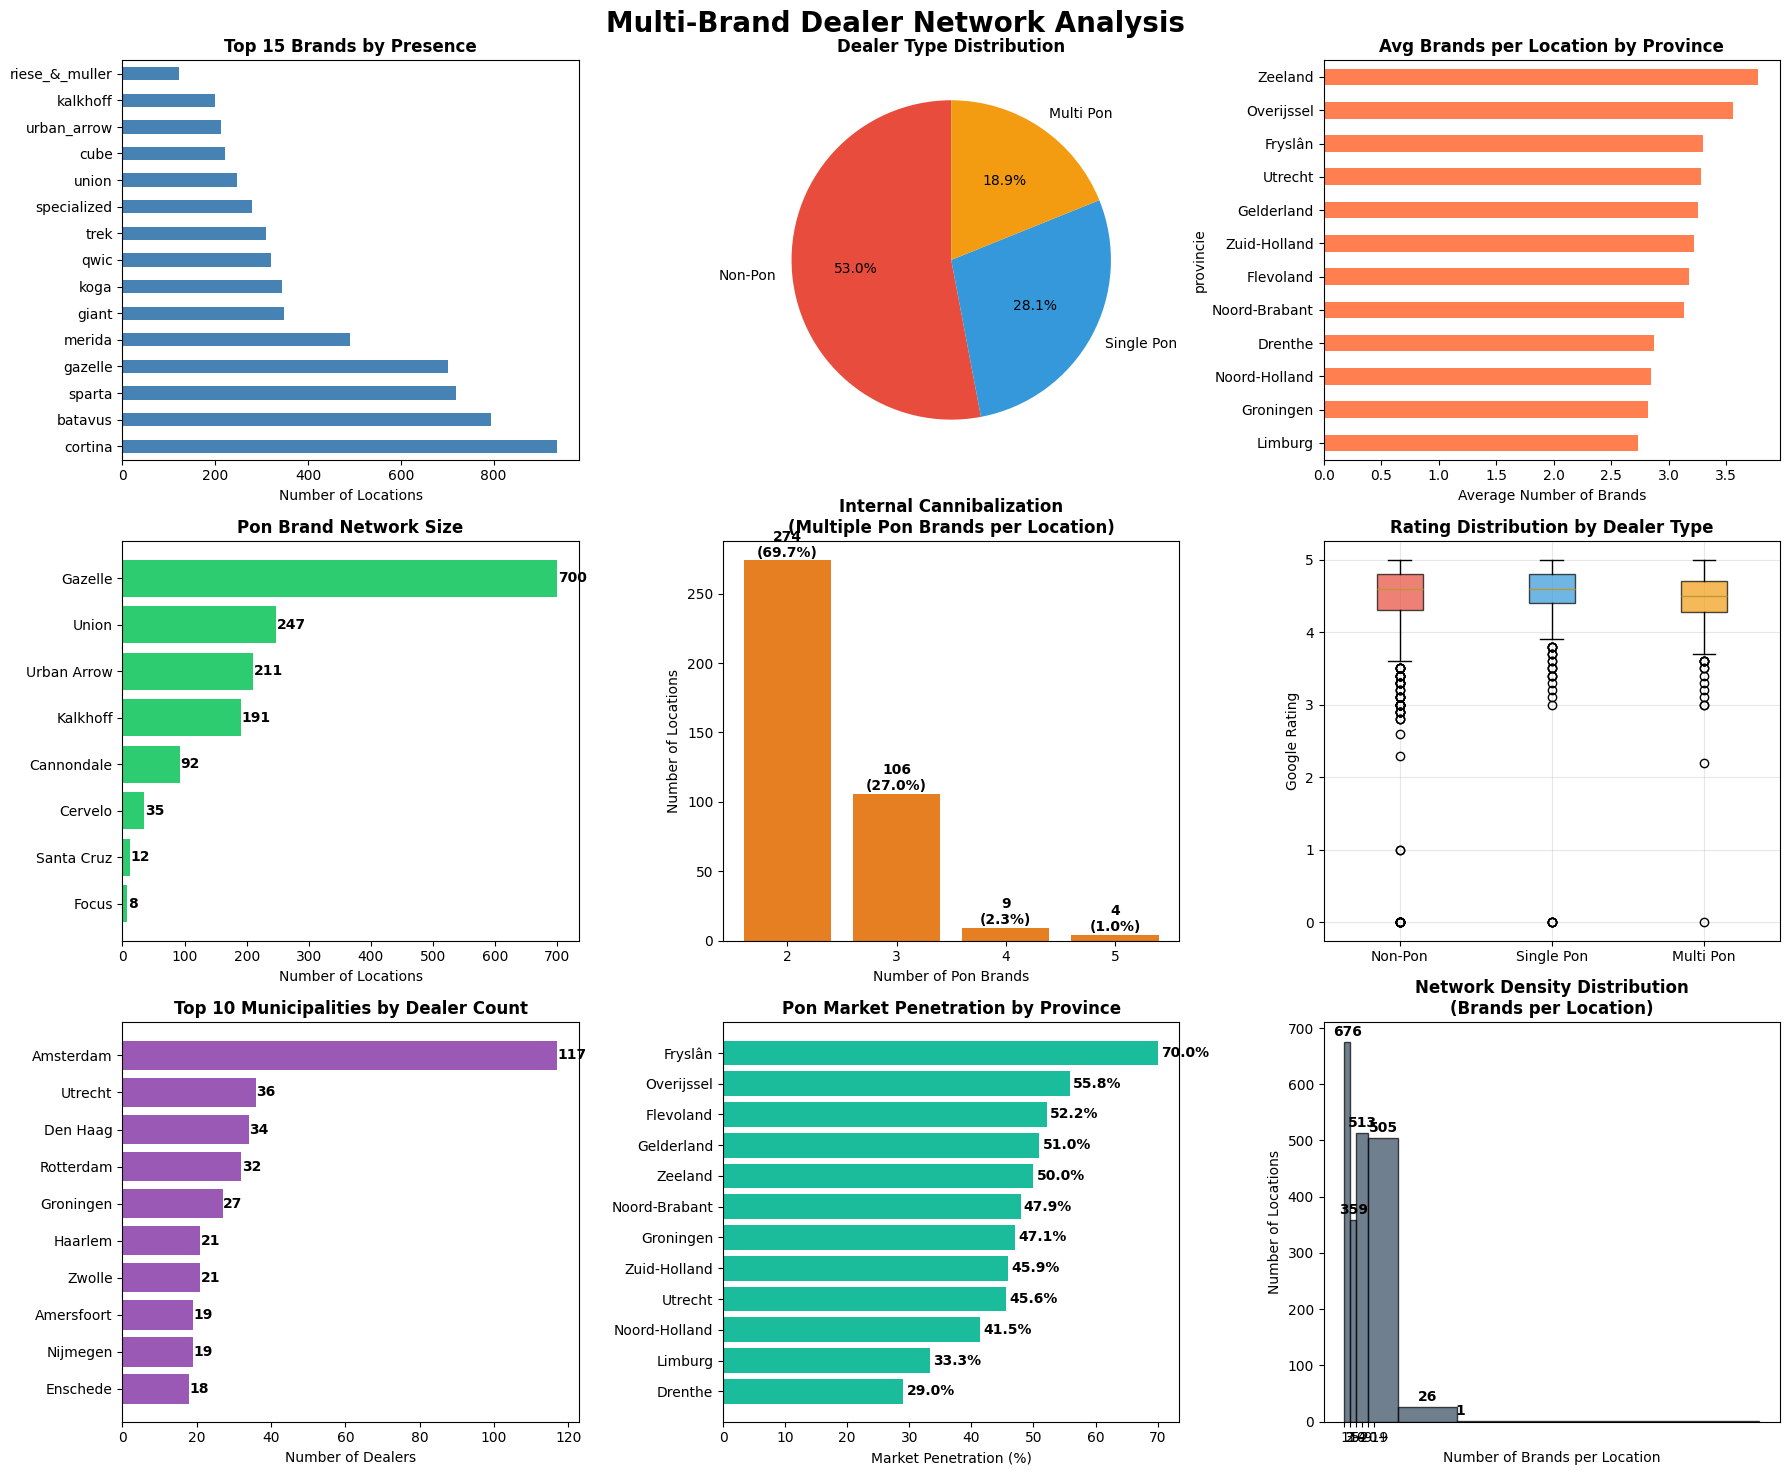


=== COMPREHENSIVE MULTI-BRAND ANALYSIS ===

📊 NETWORK OVERVIEW:
Total unique dealer locations: 2,080
Multi-brand locations: 1,404 (67.5%)
Average brands per location: 3.2
Maximum brands at single location: 70

🎯 PON NETWORK:
Pon-exclusive dealers: 585
Multi-Pon dealers: 393
Internal cannibalization risk: 18.9%

🏆 TOP PON BRANDS:
  Gazelle: 700 locations (avg rating: 4.5)
  Union: 247 locations (avg rating: 4.4)
  Urban Arrow: 211 locations (avg rating: 4.4)
  Kalkhoff: 191 locations (avg rating: 4.5)
  Cannondale: 92 locations (avg rating: 4.6)

🗺️ PROVINCIAL PENETRATION:
  Fryslân: 70.0% (14/20 dealers)
  Overijssel: 55.8% (48/86 dealers)
  Flevoland: 52.2% (12/23 dealers)
  Gelderland: 51.0% (80/157 dealers)
  Zeeland: 50.0% (9/18 dealers)

💾 Visualization saved to: ../outputs/figures/comprehensive_multi_brand_analysis.png


In [54]:
  import matplotlib.pyplot as plt
  import seaborn as sns
  import numpy as np

  # Set up plotting style
  plt.style.use('default')
  sns.set_palette("husl")

  # Create comprehensive analysis plots
  fig, axes = plt.subplots(3, 3, figsize=(18, 15))
  fig.suptitle('Multi-Brand Dealer Network Analysis', fontsize=20, fontweight='bold')

  # 1. Brand Distribution (Top 15)
  ax = axes[0, 0]
  all_brands = []
  for brands_list in location_data['brand']:
      if isinstance(brands_list, list):
          all_brands.extend(brands_list)
      else:
          all_brands.append(brands_list)

  brand_counts = pd.Series(all_brands).value_counts().head(15)
  brand_counts.plot(kind='barh', ax=ax, color='steelblue')
  ax.set_title('Top 15 Brands by Presence', fontweight='bold')
  ax.set_xlabel('Number of Locations')

  # 2. Pon vs Non-Pon Distribution
  ax = axes[0, 1]
  dealer_types = location_data['dealer_type'].value_counts()
  colors = ['#e74c3c', '#3498db', '#f39c12']
  wedges, texts, autotexts = ax.pie(dealer_types.values, labels=dealer_types.index,
                                    autopct='%1.1f%%', colors=colors, startangle=90)
  ax.set_title('Dealer Type Distribution', fontweight='bold')

  # 3. Multi-Brand Intensity by Province
  ax = axes[0, 2]
  if location_data['provincie'].notna().sum() > 0:
      province_brands = location_data[location_data['provincie'].notna()].groupby('provincie')['n_brands'].mean().sort_values()
      province_brands.plot(kind='barh', ax=ax, color='coral')
      ax.set_title('Avg Brands per Location by Province', fontweight='bold')
      ax.set_xlabel('Average Number of Brands')
  else:
      ax.text(0.5, 0.5, 'Province data not available', ha='center', va='center', transform=ax.transAxes)
      ax.set_title('Province Analysis', fontweight='bold')

  # 4. Pon Brand Performance Analysis
  ax = axes[1, 0]
  pon_brand_stats = []
  PON_BRANDS = ['gazelle', 'cannondale', 'union', 'kalkhoff', 'urban_arrow',
                'cervélo', 'cervelo', 'focus', 'santa_cruz']

  for brand in PON_BRANDS:
      brand_data = location_data[location_data['pon_brands'].apply(
          lambda x: brand in x if isinstance(x, list) else False
      )]
      if len(brand_data) > 0:
          pon_brand_stats.append({
              'Brand': brand.title().replace('_', ' '),
              'Locations': len(brand_data),
              'Avg_Rating': brand_data['rating'].mean(),
              'Avg_Reviews': brand_data['n_reviews'].mean()
          })

  if pon_brand_stats:
      pon_df = pd.DataFrame(pon_brand_stats).sort_values('Locations', ascending=True)
      bars = ax.barh(pon_df['Brand'], pon_df['Locations'], color='#2ecc71')
      ax.set_title('Pon Brand Network Size', fontweight='bold')
      ax.set_xlabel('Number of Locations')

      # Add value labels on bars
      for i, bar in enumerate(bars):
          width = bar.get_width()
          ax.text(width + 1, bar.get_y() + bar.get_height()/2,
                  f'{int(width)}', ha='left', va='center', fontweight='bold')

  # 5. Internal Cannibalization Analysis
  ax = axes[1, 1]
  multi_pon_data = location_data[location_data['n_pon_brands'] > 1]
  if len(multi_pon_data) > 0:
      cannib_stats = multi_pon_data['n_pon_brands'].value_counts().sort_index()
      bars = ax.bar(cannib_stats.index.astype(str), cannib_stats.values, color='#e67e22')
      ax.set_title('Internal Cannibalization\n(Multiple Pon Brands per Location)', fontweight='bold')
      ax.set_xlabel('Number of Pon Brands')
      ax.set_ylabel('Number of Locations')

      # Add percentage labels
      total = cannib_stats.sum()
      for i, bar in enumerate(bars):
          height = bar.get_height()
          pct = height / total * 100
          ax.text(bar.get_x() + bar.get_width()/2, height + 0.5,
                  f'{height}\n({pct:.1f}%)', ha='center', va='bottom', fontweight='bold')
  else:
      ax.text(0.5, 0.5, 'No multi-Pon locations found', ha='center', va='center', transform=ax.transAxes)

  # 6. Rating Analysis by Dealer Type
  ax = axes[1, 2]
  rating_data = location_data[location_data['rating'].notna()]
  if len(rating_data) > 0:
      dealer_types = ['Non-Pon', 'Single Pon', 'Multi Pon']
      rating_by_type = []

      for dtype in dealer_types:
          type_data = rating_data[rating_data['dealer_type'] == dtype]['rating']
          if len(type_data) > 0:
              rating_by_type.append(type_data)
          else:
              rating_by_type.append(pd.Series([]))

      # Create box plot
      bp = ax.boxplot(rating_by_type, labels=dealer_types, patch_artist=True)
      colors = ['#e74c3c', '#3498db', '#f39c12']
      for patch, color in zip(bp['boxes'], colors):
          patch.set_facecolor(color)
          patch.set_alpha(0.7)

      ax.set_title('Rating Distribution by Dealer Type', fontweight='bold')
      ax.set_ylabel('Google Rating')
      ax.grid(True, alpha=0.3)

  # 7. Geographic Spread - Top Municipalities
  ax = axes[2, 0]
  if 'gemeente' in location_data.columns:
      gemeente_counts = location_data['gemeente'].value_counts().head(10)
      gemeente_counts = gemeente_counts.sort_values()
      bars = ax.barh(gemeente_counts.index, gemeente_counts.values, color='#9b59b6')
      ax.set_title('Top 10 Municipalities by Dealer Count', fontweight='bold')
      ax.set_xlabel('Number of Dealers')

      # Add value labels
      for i, bar in enumerate(bars):
          width = bar.get_width()
          ax.text(width + 0.1, bar.get_y() + bar.get_height()/2,
                  f'{int(width)}', ha='left', va='center', fontweight='bold')

  # 8. Market Penetration Analysis
  ax = axes[2, 1]
  penetration_data = []
  if location_data['provincie'].notna().sum() > 0:
      for province in location_data['provincie'].dropna().unique():
          prov_data = location_data[location_data['provincie'] == province]
          total_dealers = len(prov_data)
          pon_dealers = len(prov_data[prov_data['is_pon_dealer']])
          penetration = (pon_dealers / total_dealers * 100) if total_dealers > 0 else 0

          penetration_data.append({
              'Province': province,
              'Total_Dealers': total_dealers,
              'Pon_Dealers': pon_dealers,
              'Penetration_Pct': penetration
          })

      if penetration_data:
          pen_df = pd.DataFrame(penetration_data).sort_values('Penetration_Pct')
          bars = ax.barh(pen_df['Province'], pen_df['Penetration_Pct'], color='#1abc9c')
          ax.set_title('Pon Market Penetration by Province', fontweight='bold')
          ax.set_xlabel('Market Penetration (%)')

          # Add percentage labels
          for i, bar in enumerate(bars):
              width = bar.get_width()
              ax.text(width + 0.5, bar.get_y() + bar.get_height()/2,
                      f'{width:.1f}%', ha='left', va='center', fontweight='bold')

  # 9. Network Density Analysis
  ax = axes[2, 2]
  density_bins = [1, 2, 3, 5, 10, 20]
  density_labels = ['1', '2', '3-4', '5-9', '10-19', '20+']
  brand_counts = location_data['n_brands']

  # Create histogram
  n, bins, patches = ax.hist(brand_counts, bins=density_bins + [brand_counts.max()+1],
                            alpha=0.7, color='#34495e', edgecolor='black')

  ax.set_title('Network Density Distribution\n(Brands per Location)', fontweight='bold')
  ax.set_xlabel('Number of Brands per Location')
  ax.set_ylabel('Number of Locations')
  ax.set_xticks(range(1, len(density_labels)+1))
  ax.set_xticklabels(density_labels)

  # Add count labels on bars
  for i in range(len(n)):
      if n[i] > 0:
          ax.text((density_bins[i] + density_bins[i+1])/2 if i < len(density_bins)-1 else density_bins[i] + 0.5,
                  n[i] + 5, f'{int(n[i])}', ha='center', va='bottom', fontweight='bold')

  plt.tight_layout()
  plt.savefig(OUTPUT_DIR / 'figures' / 'comprehensive_multi_brand_analysis.png',
              dpi=300, bbox_inches='tight')
  plt.show()

  print("\n=== COMPREHENSIVE MULTI-BRAND ANALYSIS ===")

  # Summary Statistics
  print(f"\n📊 NETWORK OVERVIEW:")
  print(f"Total unique dealer locations: {len(location_data):,}")
  print(f"Multi-brand locations: {(location_data['n_brands'] > 1).sum():,} ({(location_data['n_brands'] > 1).mean():.1%})")
  print(f"Average brands per location: {location_data['n_brands'].mean():.1f}")
  print(f"Maximum brands at single location: {location_data['n_brands'].max()}")

  print(f"\n🎯 PON NETWORK:")
  print(f"Pon-exclusive dealers: {(location_data['dealer_type'] == 'Single Pon').sum():,}")
  print(f"Multi-Pon dealers: {(location_data['dealer_type'] == 'Multi Pon').sum():,}")
  print(f"Internal cannibalization risk: {(location_data['n_pon_brands'] > 1).mean():.1%}")

  if pon_brand_stats:
      print(f"\n🏆 TOP PON BRANDS:")
      for brand_info in sorted(pon_brand_stats, key=lambda x: x['Locations'], reverse=True)[:5]:
          print(f"  {brand_info['Brand']}: {brand_info['Locations']} locations "
                f"(avg rating: {brand_info['Avg_Rating']:.1f})")

  if location_data['provincie'].notna().sum() > 0 and penetration_data:
      print(f"\n🗺️ PROVINCIAL PENETRATION:")
      for prov_info in sorted(penetration_data, key=lambda x: x['Penetration_Pct'], reverse=True)[:5]:
          print(f"  {prov_info['Province']}: {prov_info['Penetration_Pct']:.1f}% "
                f"({prov_info['Pon_Dealers']}/{prov_info['Total_Dealers']} dealers)")

  print(f"\n💾 Visualization saved to: {OUTPUT_DIR / 'figures' / 'comprehensive_multi_brand_analysis.png'}")

=== ENHANCED PROVINCIAL PENETRATION ANALYSIS ===


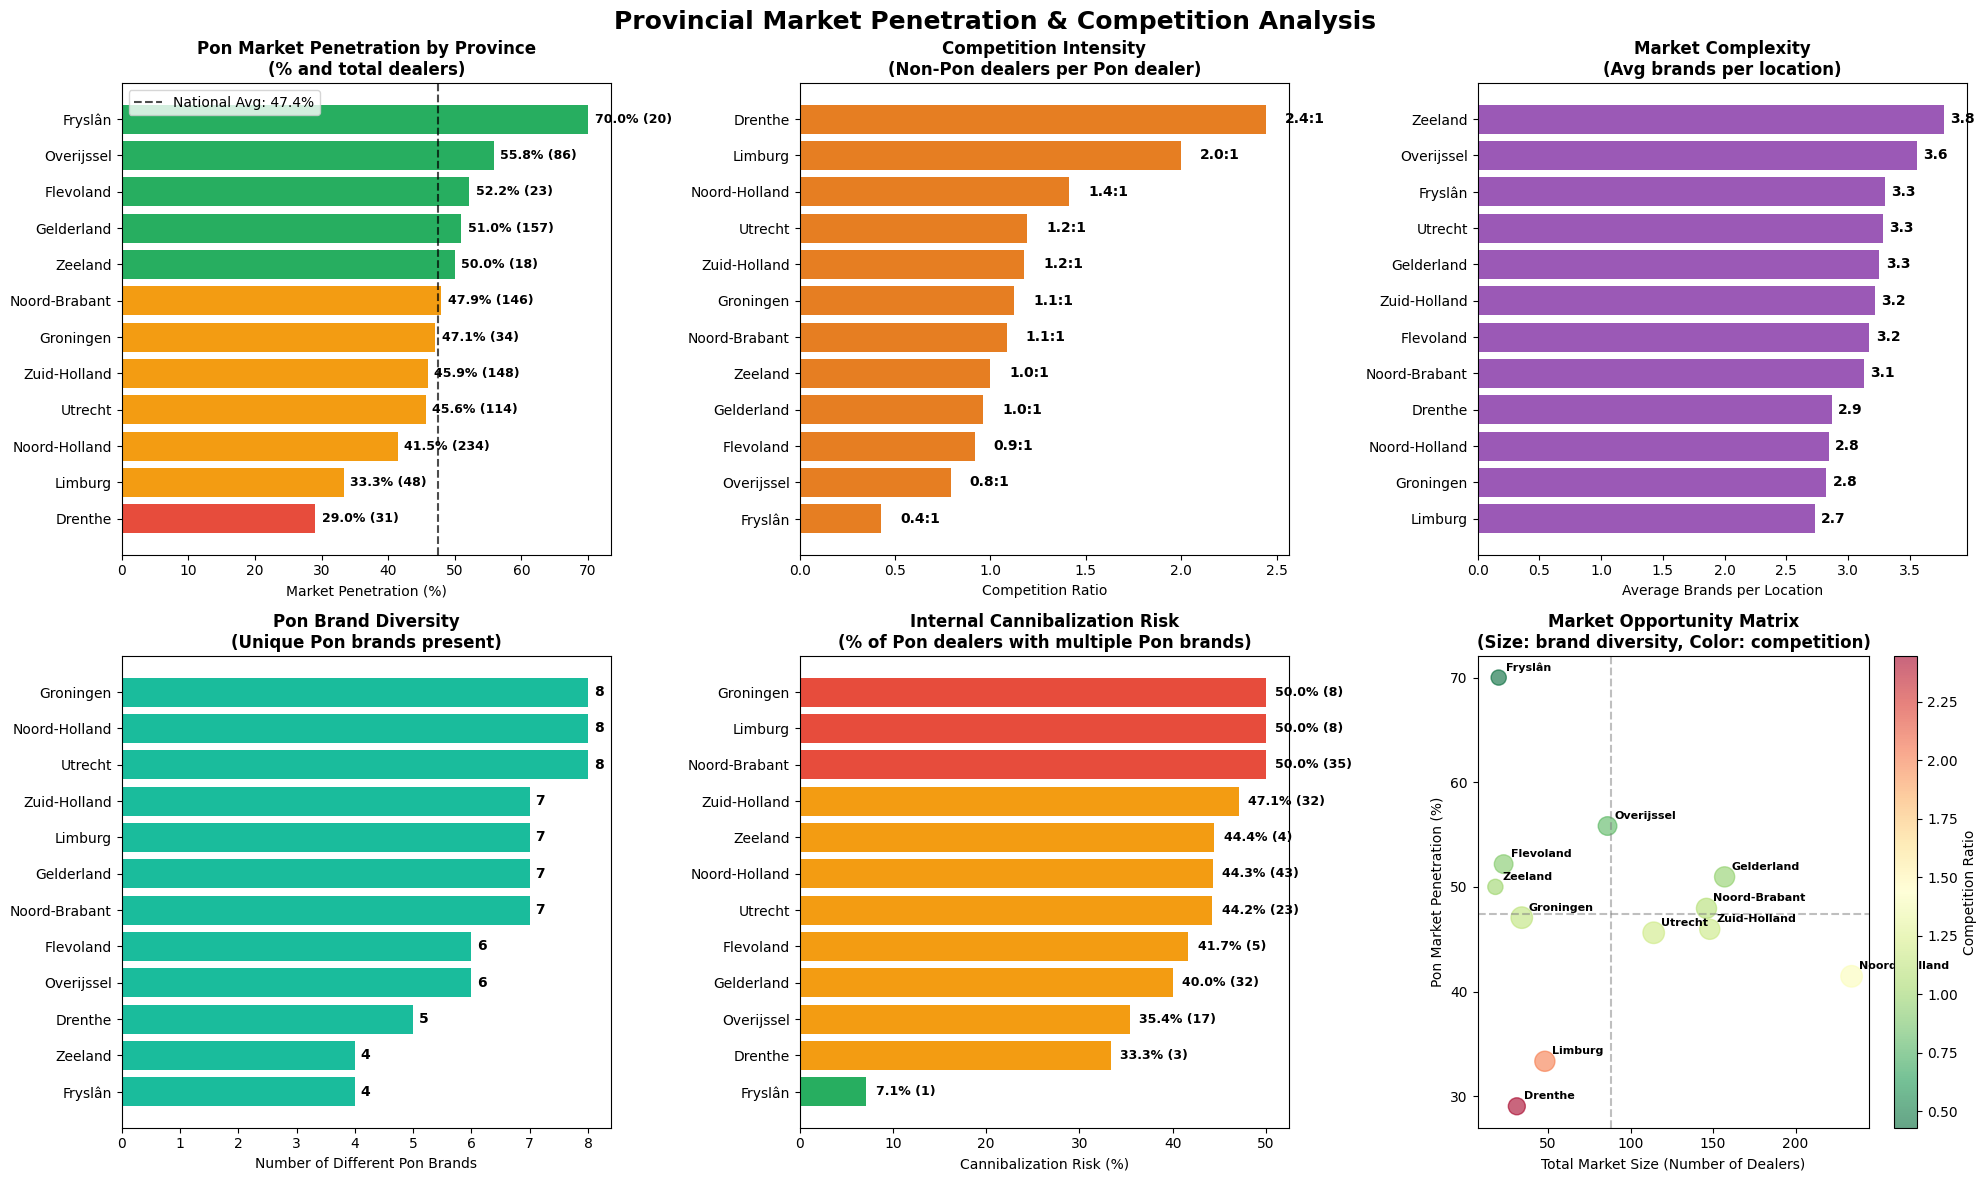


🎯 PROVINCIAL STRATEGIC INSIGHTS:

🚀 HIGH OPPORTUNITY PROVINCES (Low penetration, large market):
  Noord-Holland: 41.5% penetration, 234 dealers, 1.4:1 competition
  Zuid-Holland: 45.9% penetration, 148 dealers, 1.2:1 competition
  Utrecht: 45.6% penetration, 114 dealers, 1.2:1 competition

🛡️ DEFENSIVE FOCUS PROVINCES (High penetration, high cannibalization):
  Noord-Brabant: 47.9% penetration, 50.0% cannibalization risk
  Zeeland: 50.0% penetration, 44.4% cannibalization risk
  Flevoland: 52.2% penetration, 41.7% cannibalization risk

👑 MARKET LEADER PROVINCES (High penetration, low competition):
  Fryslân: 70.0% penetration, 0.4:1 competition
  Overijssel: 55.8% penetration, 0.8:1 competition
  Flevoland: 52.2% penetration, 0.9:1 competition
  Gelderland: 51.0% penetration, 1.0:1 competition
  Zeeland: 50.0% penetration, 1.0:1 competition
  Noord-Brabant: 47.9% penetration, 1.1:1 competition

💾 Detailed provincial data saved to: ../outputs/tables/provincial_penetration_analysis.csv


In [55]:

  # Enhanced Provincial Analysis
  if location_data['provincie'].notna().sum() > 0:

      print("=== ENHANCED PROVINCIAL PENETRATION ANALYSIS ===")

      # Create comprehensive provincial dataset
      provincial_analysis = []

      for province in location_data['provincie'].dropna().unique():
          prov_data = location_data[location_data['provincie'] == province].copy()

          # Basic metrics
          total_dealers = len(prov_data)
          pon_dealers = len(prov_data[prov_data['is_pon_dealer']])
          non_pon_dealers = total_dealers - pon_dealers
          penetration = (pon_dealers / total_dealers * 100) if total_dealers > 0 else 0

          # Multi-brand analysis
          multi_brand_locations = len(prov_data[prov_data['n_brands'] > 1])
          multi_pon_locations = len(prov_data[prov_data['n_pon_brands'] > 1])
          avg_brands_per_location = prov_data['n_brands'].mean()

          # Rating analysis
          avg_rating = prov_data['rating'].mean() if prov_data['rating'].notna().sum() > 0 else None
          avg_reviews = prov_data['n_reviews'].mean() if prov_data['n_reviews'].notna().sum() > 0 else None

          # Pon brand diversity
          all_pon_brands = []
          for brands_list in prov_data['pon_brands']:
              if isinstance(brands_list, list):
                  all_pon_brands.extend(brands_list)
          pon_brand_diversity = len(set(all_pon_brands)) if all_pon_brands else 0

          # Competition intensity
          competition_ratio = non_pon_dealers / pon_dealers if pon_dealers > 0 else float('inf')

          provincial_analysis.append({
              'Province': province,
              'Total_Dealers': total_dealers,
              'Pon_Dealers': pon_dealers,
              'Non_Pon_Dealers': non_pon_dealers,
              'Penetration_Pct': penetration,
              'Multi_Brand_Locations': multi_brand_locations,
              'Multi_Pon_Locations': multi_pon_locations,
              'Avg_Brands_Per_Location': avg_brands_per_location,
              'Pon_Brand_Diversity': pon_brand_diversity,
              'Competition_Ratio': competition_ratio,
              'Avg_Rating': avg_rating,
              'Avg_Reviews': avg_reviews,
              'Multi_Brand_Pct': (multi_brand_locations / total_dealers * 100) if total_dealers > 0 else 0,
              'Cannibalization_Risk': (multi_pon_locations / pon_dealers * 100) if pon_dealers > 0 else 0
          })

      prov_df = pd.DataFrame(provincial_analysis)

      # Create enhanced provincial visualization
      fig, axes = plt.subplots(2, 3, figsize=(20, 12))
      fig.suptitle('Provincial Market Penetration & Competition Analysis', fontsize=18, fontweight='bold')

      # 1. Market Penetration with volume indicators
      ax = axes[0, 0]
      prov_sorted = prov_df.sort_values('Penetration_Pct')

      # Create bar chart with different colors based on penetration level
      colors = ['#e74c3c' if x < 30 else '#f39c12' if x < 50 else '#27ae60'
                for x in prov_sorted['Penetration_Pct']]

      bars = ax.barh(prov_sorted['Province'], prov_sorted['Penetration_Pct'], color=colors)

      # Add total dealer count as text on bars
      for i, (bar, total) in enumerate(zip(bars, prov_sorted['Total_Dealers'])):
          width = bar.get_width()
          ax.text(width + 1, bar.get_y() + bar.get_height()/2,
                  f'{width:.1f}% ({total})', ha='left', va='center', fontweight='bold', fontsize=9)

      ax.set_title('Pon Market Penetration by Province\n(% and total dealers)', fontweight='bold')
      ax.set_xlabel('Market Penetration (%)')
      ax.axvline(x=prov_df['Penetration_Pct'].mean(), color='black', linestyle='--', alpha=0.7, label=f'National Avg: {prov_df["Penetration_Pct"].mean():.1f}%')
      ax.legend()

      # 2. Competition Intensity
      ax = axes[0, 1]
      # Filter out infinite values for plotting
      finite_competition = prov_df[prov_df['Competition_Ratio'] != float('inf')].copy()
      finite_competition = finite_competition.sort_values('Competition_Ratio')

      bars = ax.barh(finite_competition['Province'], finite_competition['Competition_Ratio'], color='#e67e22')
      ax.set_title('Competition Intensity\n(Non-Pon dealers per Pon dealer)', fontweight='bold')
      ax.set_xlabel('Competition Ratio')

      # Add ratio labels
      for bar, ratio in zip(bars, finite_competition['Competition_Ratio']):
          width = bar.get_width()
          ax.text(width + 0.1, bar.get_y() + bar.get_height()/2,
                  f'{ratio:.1f}:1', ha='left', va='center', fontweight='bold')

      # 3. Multi-Brand Market Complexity
      ax = axes[0, 2]
      prov_complex = prov_df.sort_values('Avg_Brands_Per_Location')

      bars = ax.barh(prov_complex['Province'], prov_complex['Avg_Brands_Per_Location'], color='#9b59b6')
      ax.set_title('Market Complexity\n(Avg brands per location)', fontweight='bold')
      ax.set_xlabel('Average Brands per Location')

      # Add labels
      for bar, avg in zip(bars, prov_complex['Avg_Brands_Per_Location']):
          width = bar.get_width()
          ax.text(width + 0.05, bar.get_y() + bar.get_height()/2,
                  f'{avg:.1f}', ha='left', va='center', fontweight='bold')

      # 4. Pon Brand Diversity
      ax = axes[1, 0]
      prov_diversity = prov_df.sort_values('Pon_Brand_Diversity')

      bars = ax.barh(prov_diversity['Province'], prov_diversity['Pon_Brand_Diversity'], color='#1abc9c')
      ax.set_title('Pon Brand Diversity\n(Unique Pon brands present)', fontweight='bold')
      ax.set_xlabel('Number of Different Pon Brands')

      # Add labels
      for bar, diversity in zip(bars, prov_diversity['Pon_Brand_Diversity']):
          width = bar.get_width()
          ax.text(width + 0.1, bar.get_y() + bar.get_height()/2,
                  f'{int(diversity)}', ha='left', va='center', fontweight='bold')

      # 5. Cannibalization Risk
      ax = axes[1, 1]
      prov_cannib = prov_df[prov_df['Pon_Dealers'] > 0].sort_values('Cannibalization_Risk')  # Only provinces with Pon dealers

      # Color code based on risk level
      colors = ['#27ae60' if x < 25 else '#f39c12' if x < 50 else '#e74c3c'
                for x in prov_cannib['Cannibalization_Risk']]

      bars = ax.barh(prov_cannib['Province'], prov_cannib['Cannibalization_Risk'], color=colors)
      ax.set_title('Internal Cannibalization Risk\n(% of Pon dealers with multiple Pon brands)', fontweight='bold')
      ax.set_xlabel('Cannibalization Risk (%)')

      # Add labels
      for bar, risk, multi_pon in zip(bars, prov_cannib['Cannibalization_Risk'], prov_cannib['Multi_Pon_Locations']):
          width = bar.get_width()
          ax.text(width + 1, bar.get_y() + bar.get_height()/2,
                  f'{risk:.1f}% ({int(multi_pon)})', ha='left', va='center', fontweight='bold', fontsize=9)

      # 6. Market Opportunity Matrix (Penetration vs Market Size)
      ax = axes[1, 2]

      # Create bubble plot
      x = prov_df['Total_Dealers']  # Market size
      y = prov_df['Penetration_Pct']  # Current penetration
      s = prov_df['Pon_Brand_Diversity'] * 30  # Bubble size = brand diversity

      scatter = ax.scatter(x, y, s=s, alpha=0.6, c=prov_df['Competition_Ratio'], cmap='RdYlGn_r')

      # Add province labels
      for i, province in enumerate(prov_df['Province']):
          ax.annotate(province, (x.iloc[i], y.iloc[i]), xytext=(5, 5),
                     textcoords='offset points', fontsize=8, fontweight='bold')

      ax.set_xlabel('Total Market Size (Number of Dealers)')
      ax.set_ylabel('Pon Market Penetration (%)')
      ax.set_title('Market Opportunity Matrix\n(Size: brand diversity, Color: competition)', fontweight='bold')

      # Add quadrant lines
      ax.axhline(y=prov_df['Penetration_Pct'].mean(), color='gray', linestyle='--', alpha=0.5)
      ax.axvline(x=prov_df['Total_Dealers'].mean(), color='gray', linestyle='--', alpha=0.5)

      # Add colorbar
      plt.colorbar(scatter, ax=ax, label='Competition Ratio')

      plt.tight_layout()
      plt.savefig(OUTPUT_DIR / 'figures' / 'enhanced_provincial_analysis.png',
                  dpi=300, bbox_inches='tight')
      plt.show()

      # Print detailed provincial insights
      print(f"\n🎯 PROVINCIAL STRATEGIC INSIGHTS:")

      # High opportunity provinces (low penetration, large market)
      high_opportunity = prov_df[
          (prov_df['Penetration_Pct'] < prov_df['Penetration_Pct'].mean()) &
          (prov_df['Total_Dealers'] > prov_df['Total_Dealers'].mean())
      ].sort_values('Total_Dealers', ascending=False)

      if len(high_opportunity) > 0:
          print(f"\n🚀 HIGH OPPORTUNITY PROVINCES (Low penetration, large market):")
          for _, row in high_opportunity.iterrows():
              print(f"  {row['Province']}: {row['Penetration_Pct']:.1f}% penetration, {row['Total_Dealers']} dealers, {row['Competition_Ratio']:.1f}:1 competition")

      # Defensive provinces (high penetration, high cannibalization)
      defensive = prov_df[
          (prov_df['Penetration_Pct'] > prov_df['Penetration_Pct'].mean()) &
          (prov_df['Cannibalization_Risk'] > 40)
      ].sort_values('Cannibalization_Risk', ascending=False)

      if len(defensive) > 0:
          print(f"\n🛡️ DEFENSIVE FOCUS PROVINCES (High penetration, high cannibalization):")
          for _, row in defensive.iterrows():
              print(f"  {row['Province']}: {row['Penetration_Pct']:.1f}% penetration, {row['Cannibalization_Risk']:.1f}% cannibalization risk")

      # Market leaders (high penetration, low competition)
      leaders = prov_df[
          (prov_df['Penetration_Pct'] > prov_df['Penetration_Pct'].mean()) &
          (prov_df['Competition_Ratio'] < prov_df['Competition_Ratio'].mean())
      ].sort_values('Penetration_Pct', ascending=False)

      if len(leaders) > 0:
          print(f"\n👑 MARKET LEADER PROVINCES (High penetration, low competition):")
          for _, row in leaders.iterrows():
              print(f"  {row['Province']}: {row['Penetration_Pct']:.1f}% penetration, {row['Competition_Ratio']:.1f}:1 competition")

      # Save detailed provincial data
      prov_df.to_csv(OUTPUT_DIR / 'tables' / 'provincial_penetration_analysis.csv', index=False)
      print(f"\n💾 Detailed provincial data saved to: {OUTPUT_DIR / 'tables' / 'provincial_penetration_analysis.csv'}")

      # Summary statistics
      print(f"\n📊 PROVINCIAL SUMMARY STATISTICS:")
      print(f"Average market penetration: {prov_df['Penetration_Pct'].mean():.1f}%")
      print(f"Highest penetration: {prov_df.loc[prov_df['Penetration_Pct'].idxmax(), 'Province']} ({prov_df['Penetration_Pct'].max():.1f}%)")
      print(f"Lowest penetration: {prov_df.loc[prov_df['Penetration_Pct'].idxmin(), 'Province']} ({prov_df['Penetration_Pct'].min():.1f}%)")
      print(f"Average competition ratio: {prov_df[prov_df['Competition_Ratio'] != float('inf')]['Competition_Ratio'].mean():.1f}:1")
      print(f"Most competitive province: {prov_df.loc[prov_df[prov_df['Competition_Ratio'] != float('inf')]['Competition_Ratio'].idxmax(), 'Province']}")
      print(f"Average cannibalization risk: {prov_df[prov_df['Pon_Dealers'] > 0]['Cannibalization_Risk'].mean():.1f}%")

  else:
      print("❌ Province data not available for enhanced analysis")


## Summary

Created a location-based dataset with proper multi-brand handling:
- Each row = one unique dealer location
- All brands concatenated in display columns
- Proper rating formatting
- Ready for dashboard visualization

Key output: `data/processed/dealers_dashboard.parquet`